# A crash-course in Bayesian statistics

Bayes' theorem in often used in science to describe the probability density of a model parameter given some observational data:

\begin{equation}
    p(\theta|x)=\frac{p(x|\theta)\,p(\theta)}{p(x)}.
\end{equation}

Here:

 - $p(\theta|x)$ is the <b>posterior probability density</b> of some parameter $\theta$ given some data $x$.
 - $p(x|\theta)$ is the <b>likelihood</b> of $x$ occuring, given $\theta$.
 - $p(\theta)$ is the <b>prior probability density</b> of $\theta$, i.e. what we think $\theta$ might be, or how we think the distribution of $\theta$ may behave.
 - $p(x)$ is somewhat confusingly called the <b>evidence</b>. It's essentially a normalisation constant so that
    
\begin{equation}
    \int\limits_{\theta_\mathrm{min}}^{\theta_\mathrm{max}}p(\theta|x)\,\mathrm{d}x\equiv 1\,.
\end{equation}

## Gaia parallaxes

We are going to apply Bayes' theorem to infer stellar distance. However, first we look at the parallaxes.

A star in the sky has a "true" parallax $\varpi$, relative to Earth's orbit, for which Gaia has measured a parallax $\varpi'$ with uncertainty $\sigma_\varpi$.

If we assume the the measurement uncertainties are Gaussian, and that <i>a priori</i> all values of $\varpi$ are equally likely ($P(\varpi)=C$), then

\begin{equation}
    p(\varpi|\varpi')=\frac{1}{\sqrt{2\pi}\sigma_\varpi}\,\exp\left(-\frac{(\varpi'-\varpi)^2}{2\sigma_\varpi^2} \right)
\end{equation}

This is a trivial example. We've simply stated best estimate of $\varpi$ is $\varpi'$, and the uncertainty is Gaussian with standard deviation $\sigma_\varpi$.

## Gaia distances

Things get more complicated when we try an estimate the distance $\rho=1/\varpi$. First, we substitute $\rho$ in the previous equation:

\begin{align}
    p(\rho|\varpi')&=p(1/\varpi|\varpi')\,\frac{\mathrm{d}\varpi}{\mathrm{d}\rho}\,\\
    &=\frac{1}{\rho^2\sqrt{2\pi}\sigma_\varpi}\,\exp\left(-\frac{(\varpi'-1/\rho)^2}{2\sigma_\varpi^2}\right)
\end{align}

In [1]:
#import modules
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# define rho likelihood
def rho_likelihood(rho,pi_prime,sigma_pi):
    
    """
    
    Function: return likelihood of measured parallax given rho
    
    Arguments:
    
        rho: float
            distance (pc)
            
        pi_prime: float
            measured parallax (arcsec)
            
        sigma_pi: float
            parallax uncertainty
            
    Result
    
        p: float
            likelihood
    
    """
    
    p=np.exp(-(pi_prime-1./rho)**2/(2*sigma_pi**2))/(rho**2*sigma_pi*np.sqrt(2*np.pi))
    
    return p

In [3]:
# define plot function
def plot_posterior(likelihood,rho,pi_prime,sigma_pi,prior=None):
    
    """
    
    Subroutine: plots posterior pdf
    
    Arguments:
    
        likelihood: function
            likelihood function of pi_prime given rho
            
        rho: float
            array of distances
            
        pi_prime: float
            measured parallax
            
        sigma_pi: float
            parallax uncertainty
            
        prior: function
            prior distribution of rho
    
    """
    
    # set posterior values
    p=likelihood(rho,pi_prime,sigma_pi)
    
    # apply prior
    if prior is not None:
        p*=prior(rho)
        
    # normalise p
    p/=np.trapz(p,rho)
        
    # make plot
    fig,ax=plt.subplots(1,1)
    ax.plot(rho,p)
    ax.set_xlabel("rho [pc]")
    ax.set_ylabel("$p(rho|pi_prime) [pc^-1]")
    
    mean=(rho*p).sum()/p.sum()
    st_dev=np.sqrt((p*(rho-mean)**2).sum()/p.sum())
    
    print(mean,st_dev)

Let's say we have star in IC348 with a measured parallax $\varpi'=3.125\,\mathrm{mas}$ and uncertainty $\sigma_\varpi=0.1\mathrm{mas}$. The posterior $p(\rho|\varpi')$ will look roughly Gaussian:

320.32869182420876 10.282230274187855


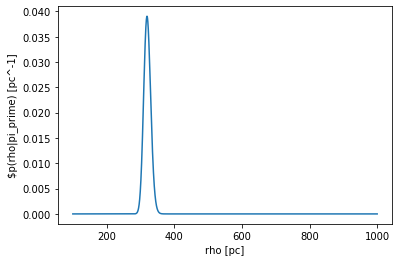

In [4]:
rho=np.linspace(100.,1000.,10000)
pi_prime=3.125e-3
sigma_pi=1.e-4
plot_posterior(rho_likelihood,rho,pi_prime,sigma_pi)

If we have a larger uncertainty -- say $\sigma_\varpi=1.0\mathrm{mas}$ -- the distribution has a heavy tail:

351.4464714585023 131.0990355617768


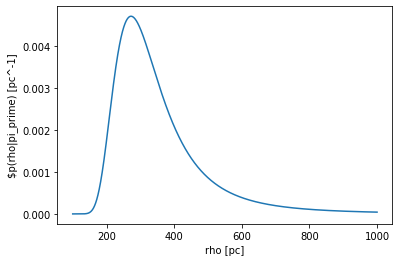

In [5]:
sigma_pi=1.e-3
plot_posterior(rho_likelihood,rho,pi_prime,sigma_pi)